In [1]:
import pyCalc as p
import matplotlib.pyplot as plt
x, b,w,c, j = p.var('i'),p.var('i'), p.var('i'), p.var(), p.var()
c.f(x,b,'*')
j.f(c,w,'+')
sig = p.var()
sig.sigmoid(j)
h = p.var('i')
cost, hh = p.var(), p.var()
hh.f(sig, h, '-')
cost.pow(hh,2)
cost.preview()

the 0th deriv of this isv2
the 0th deriv of this is( 1.000000 * g2 )
the 0th deriv of this is( ( 1.000000 * g2 ) * ( ( 1.000000 - ( sig( ( g1 * g2 ) + g3 ) ) ) * ( sig( ( g1 * g2 ) + g3 ) ) ) )
the 0th deriv of this is( 1.000000 * ( ( 1.000000 * g2 ) * ( ( 1.000000 - ( sig( ( g1 * g2 ) + g3 ) ) ) * ( sig( ( g1 * g2 ) + g3 ) ) ) ) )
the 0th deriv of this is( ( 1.000000 * ( ( 1.000000 * g2 ) * ( ( 1.000000 - ( sig( ( g1 * g2 ) + g3 ) ) ) * ( sig( ( g1 * g2 ) + g3 ) ) ) ) ) * ( ( ( sig( ( g1 * g2 ) + g3 ) ) - g7 ) * 2.000000 ) )
( pow( ( sig( ( v1 * v2 ) + v3 ) ) - v7 ) )


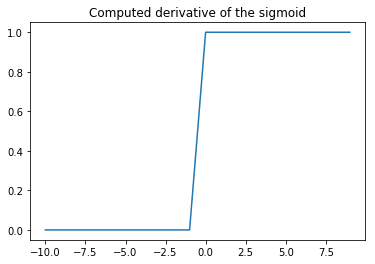

In [2]:
trainX = [i for i in range(-10, 10) ]
trainY = [1 if 5*i+3>0 else 0 for i in trainX]

w0 = 10
bias = -1

plt.plot(trainX,trainY)
plt.title('Computed derivative of the sigmoid')
plt.show()

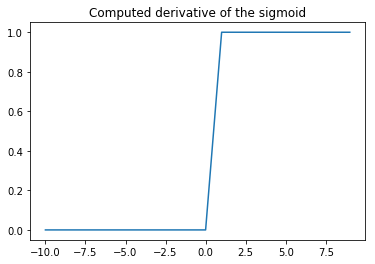

In [3]:
def predict(xin, w,b):
    return 1 if sig.value([xin,w, b])>=0.5 else 0
plt.plot(trainX,[predict(i, w0, bias) for i in trainX])
plt.title('Computed derivative of the sigmoid')
plt.show()

In [4]:
def getCost(w,b):
    s = 0
    for i in range(len(trainX)):
        s+=cost.value([trainX[i], w,b, trainY[i]])
    return s/len(trainX)
print(getCost(w0, bias))

0.026722333610295468


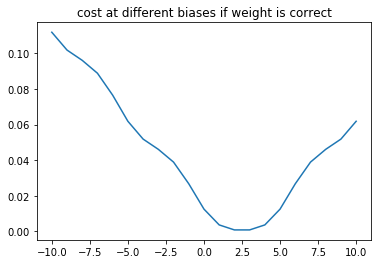

In [5]:
ws = [i for i in range(-10,11)]
plt.plot(ws,[getCost(5, i) for i in ws])
plt.title('cost at different biases if weight is correct')
plt.show()

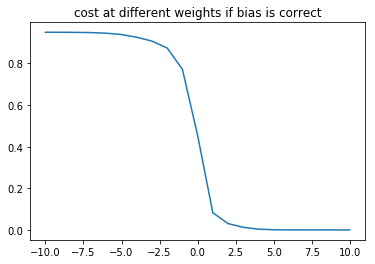

In [6]:
ws = [i for i in range(-10,11)]
plt.plot(ws,[getCost(i, 3) for i in ws])
plt.title('cost at different weights if bias is correct')
plt.show()

In [18]:
def getWderiv(w,b):
    s = 0
    for i in range(len(trainX)):
        s+=cost.getDeriv(1,[trainX[i], w,b, trainY[i]])
    return s/len(trainX)
print(getWderiv(7.5, 3))

2033.3


In [21]:
def getBderiv(w,b):
    s = 0
    for i in range(len(trainX)):
        s+=cost.getDeriv(2,[trainX[i], w,b, trainY[i]])
    return s/len(trainX)
print(getBderiv(5, -5))

0.0031294198562149705


10000.0

In [4]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in range(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)



print(l1_delta.shape)

(4, 1)
